In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [3]:
df = pd.read_csv('fashion-mnist_train.csv', dtype='int')

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(df)

60000

### Sort images into categories

In [15]:
images = {}
for label in label_names:
    images[label] = df[df['label']==label].iloc[:, 1:].as_matrix().T

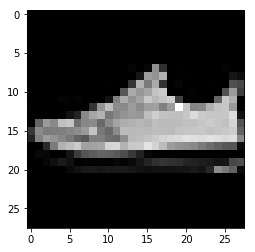

In [18]:
plt.imshow(images[7][:, 34].reshape(28, 28), cmap='gray')

### Create eigenfaces for each label

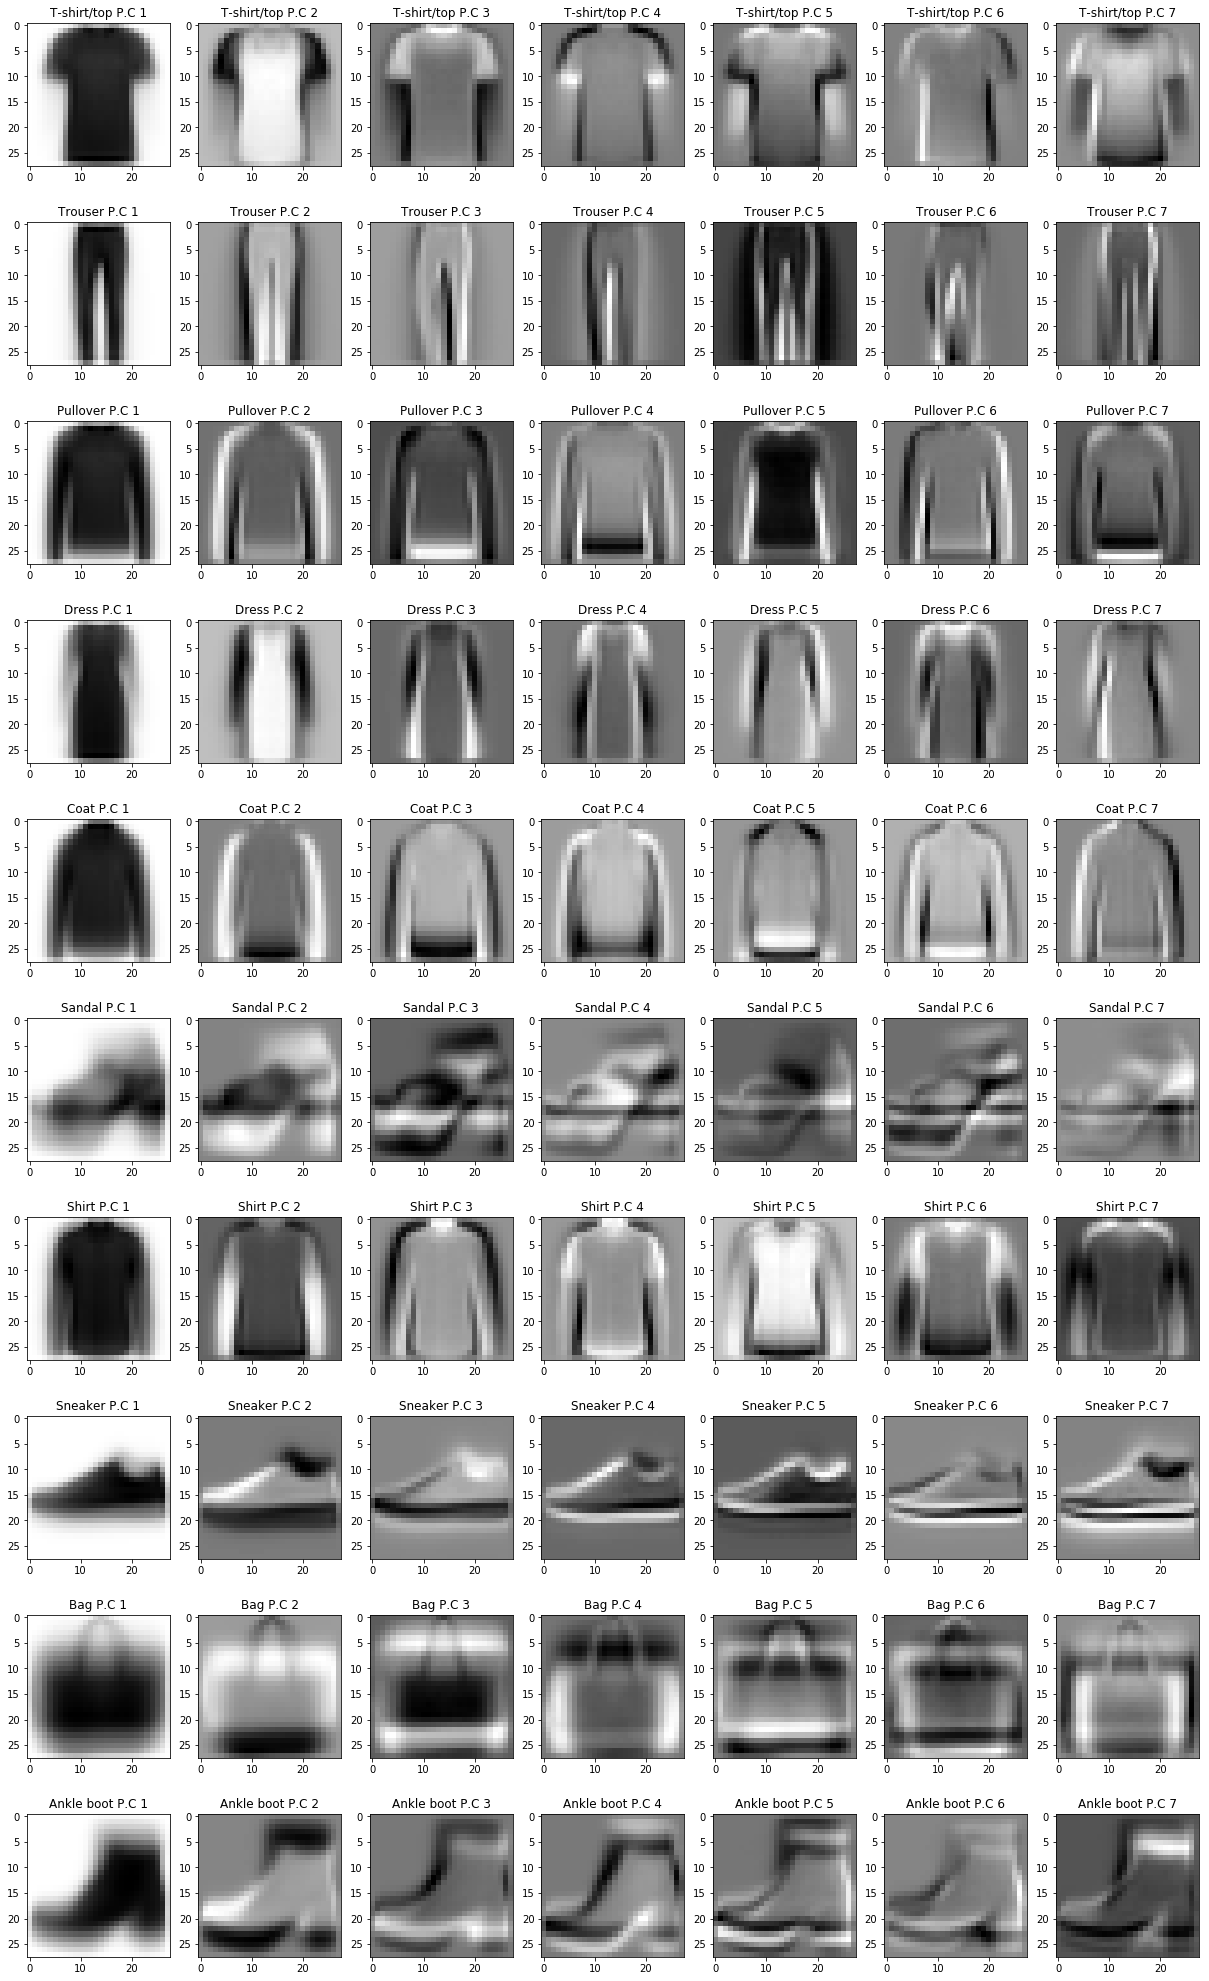

In [98]:
f, axs = plt.subplots(10, 7, figsize=(21, 36))

SingularValues = {}

for l in label_names:
    U, S, V = np.linalg.svd(images[l])
    SingularValues[l] = S
    for pc_i in range(7):
        axs[l][pc_i].imshow(U[:, pc_i].reshape(28, 28), cmap='gray')
        axs[l][pc_i].set_title("{} P.C {}".format(label_names[l], pc_i+1))

### Singular Values

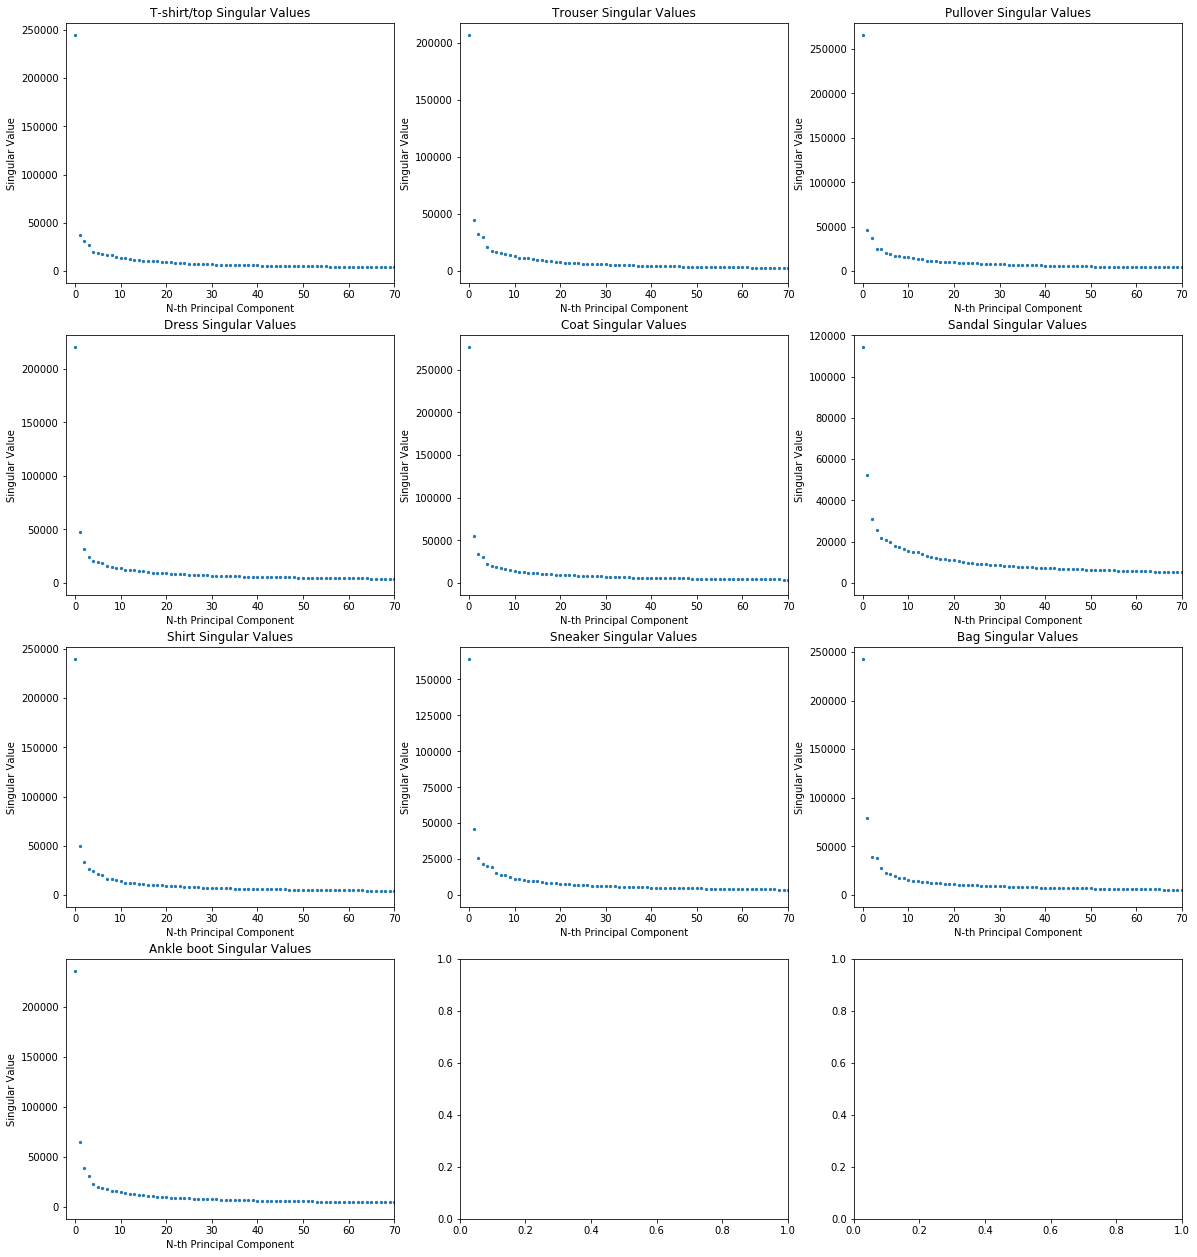

In [116]:
f, axs = plt.subplots(4, 3, figsize=(20, 22))

for l in SingularValues:
    i1 = int(l / 3)
    i2 = l - i1 * 3
    
    axs[i1][i2].scatter(x=[i for i in range(len(SingularValues[l]))], y=SingularValues[l], s=5)
    axs[i1][i2].set_xlim(-2, 70)
    axs[i1][i2].set_xlabel("N-th Principal Component")
    axs[i1][i2].set_ylabel("Singular Value")
    axs[i1][i2].set_title("{} {}".format(label_names[l], "Singular Values"))